# Importing the Packages

In [102]:
!pip install huggingface_hub

In [103]:
!pip install umap-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\chris\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Using cached numpy-1.21.6-cp39-cp39-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [104]:
!pip install transformers datasets

In [105]:
!pip install scikit-multilearn

# Importing the necessary libraries

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit learn

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# XGBoost
import xgboost
from xgboost import XGBClassifier

#NLTK
import nltk
from nltk.corpus import stopwords #Stop Words
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.stem.snowball import SnowballStemmer # Stemmer
from nltk.stem import WordNetLemmatizer # Lematizer

#Regular Expression
import re


# nltk.download()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#globe
import glob

#operating system
import os

#string
import string

#tensor flow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import torch

#wordcloud
from wordcloud import WordCloud, STOPWORDS

# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Mounting Drive

In [108]:
artists = pd.read_csv('artists-data.csv')
lyrics = pd.read_csv('lyrics-data.csv')

# Data Preparation

In [109]:
artists.head()

,Artist,Genres,Songs,Popularity,Link
0,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
1,Chiclete com Banana,Axé,268.0,3.8,/chiclete-com-banana/
2,Banda Eva,Axé; Romântico; Reggae,215.0,2.3,/banda-eva/
3,É O Tchan,Axé,129.0,1.6,/e-o-tchan/
4,Claudia Leitte,Pop; Axé; Romântico,167.0,1.5,/claudia-leitte/


In [110]:
lyrics.head()

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


In [111]:
lyrics.language.unique()

array(['pt', 'es', 'en', nan, 'it', 'gl', 'fr', 'de', 'tl', 'et', 'fi',
       'pl', 'da', 'st', 'sv', 'ro', 'af', 'no', 'eu', 'rw', 'sw', 'ga',
       'cy', 'ca', 'ny', 'ko', 'ar', 'gd', 'tr', 'id', 'su', 'lg', 'ru',
       'nl', 'sq', 'is', 'cs', 'jw', 'lv', 'hu', 'ms', 'ku', 'zh', 'hr',
       'ht', 'fa', 'mg', 'vi', 'ja', 'hmn', 'sr', 'iw', 'sl'],
      dtype=object)

## Mapping the Language Abbreviation to the Language

In [112]:
## Changing from language abbreviation to language
language_map = {
    'pt': 'Portuguese',
    'es': 'Spanish',
    'en': 'English',
    'it': 'Italian',
    'gl': 'Galician',
    'fr': 'French',
    'de': 'German',
    'tl': 'Tagalog',
    'et': 'Estonian',
    'fi': 'Finnish',
    'pl': 'Polish',
    'da': 'Danish',
    'st': 'Southern Sotho',
    'sv': 'Swedish',
    'ro': 'Romanian',
    'af': 'Afrikaans',
    'no': 'Norwegian',
    'eu': 'Basque',
    'rw': 'Kinyarwanda',
    'sw': 'Swahili',
    'ga': 'Irish',
    'cy': 'Welsh',
    'ca': 'Catalan',
    'ny': 'Chichewa',
    'ko': 'Korean',
    'ar': 'Arabic',
    'gd': 'Gaelic',
    'tr': 'Turkish',
    'id': 'Indonesian',
    'su': 'Sundanese',
    'lg': 'Luganda',
    'ru': 'Russian',
    'nl': 'Dutch',
    'sq': 'Albanian',
    'is': 'Icelandic',
    'cs': 'Czech',
    'jw': 'Javanese',
    'lv': 'Latvian',
    'hu': 'Hungarian',
    'ms': 'Malay',
    'ku': 'Kurdish',
    'zh': 'Chinese',
    'hr': 'Croatian',
    'ht': 'Haitian Creole',
    'fa': 'Persian',
    'mg': 'Malagasy',
    'vi': 'Vietnamese',
    'ja': 'Japanese',
    'hmn': 'Hmong',
    'sr': 'Serbian',
    'iw': 'Hebrew',
    'sl': 'Slovenian'
}


# Map the language abbreviation column to language name using the language_map dictionary
lyrics['language'] = lyrics['language'].map(language_map)

In [113]:
# Dropping unnecessary columns
artists = artists.drop(['Songs', 'Popularity'], axis = 1)
lyrics = lyrics.drop(['SLink'], axis = 1)

In [114]:
#lyrics shape
lyrics.shape

(379931, 4)

In [115]:
#artists shape
artists.shape

(4168, 3)

In [116]:
lyrics.head()

,ALink,SName,Lyric,language
0,/ivete-sangalo/,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",Portuguese
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,Portuguese
2,/ivete-sangalo/,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,Portuguese
3,/ivete-sangalo/,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,Portuguese
4,/ivete-sangalo/,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,Portuguese


## Merging the datasets

In [117]:
df_merged = pd.merge(lyrics,artists, how = 'inner', left_on = 'ALink', right_on = 'Link')
df_merged.head()

,ALink,SName,Lyric,language,Artist,Genres,Link
0,/ivete-sangalo/,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",Portuguese,Ivete Sangalo,Pop; Axé; Romântico,/ivete-sangalo/
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,Portuguese,Ivete Sangalo,Pop; Axé; Romântico,/ivete-sangalo/
2,/ivete-sangalo/,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,Portuguese,Ivete Sangalo,Pop; Axé; Romântico,/ivete-sangalo/
3,/ivete-sangalo/,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,Portuguese,Ivete Sangalo,Pop; Axé; Romântico,/ivete-sangalo/
4,/ivete-sangalo/,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,Portuguese,Ivete Sangalo,Pop; Axé; Romântico,/ivete-sangalo/


In [118]:
## Dropping unnecessary columns
df_merged = df_merged.drop(['ALink', 'SName', 'Artist', 'Link'], axis = 1)

In [119]:
df_merged

,Lyric,language,Genres
0,"Tudo o que eu quero nessa vida,\nToda vida, é\...",Portuguese,Pop; Axé; Romântico
1,Meu coração\nSem direção\nVoando só por voar\n...,Portuguese,Pop; Axé; Romântico
2,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,Portuguese,Pop; Axé; Romântico
3,Quando a chuva passar\n\nPra quê falar\nSe voc...,Portuguese,Pop; Axé; Romântico
4,A minha sorte grande foi você cair do céu\nMin...,Portuguese,Pop; Axé; Romântico
...,...,...,...
378983,Chorus\nHere we stand waiting on the plain\nDa...,English,World Music; Gospel/Religioso
378984,I nearly disappeared into the mouth of a croco...,English,World Music; Gospel/Religioso
378985,"Amambuka, amambuka azothengisa izwe lakithi, i...",English,World Music; Gospel/Religioso
378986,Sweat in the heat for days on end\nwaiting for...,English,World Music; Gospel/Religioso


In [120]:
df_merged.language.value_counts()

English           191387
Portuguese        156941
Spanish             9916
Kinyarwanda         1679
Italian             1426
French              1221
German               843
Finnish              145
Swedish              112
Romanian              97
Norwegian             89
Icelandic             86
Tagalog               69
Polish                47
Galician              36
Irish                 32
Turkish               32
Indonesian            26
Welsh                 23
Sundanese             19
Afrikaans             19
Swahili               19
Korean                17
Dutch                 14
Danish                13
Catalan               13
Estonian              12
Malay                  8
Japanese               7
Southern Sotho         6
Haitian Creole         5
Arabic                 4
Russian                4
Basque                 4
Gaelic                 4
Czech                  3
Kurdish                3
Chichewa               3
Malagasy               3
Luganda                2


# English Language

We will only use songs in English for this task, therefore we must drop all other languages

In [121]:
# Keeping only lyrics in English
df_eng = df_merged.loc[df_merged['language'].isin(['English'])]

In [122]:
df_eng = df_eng.reset_index(drop = True)

In [123]:
df_eng

,Lyric,language,Genres
0,I feel so unsure\nAs I take your hand and lead...,English,Pop; Axé; Romântico
1,"Don't let them fool, ya\nOr even try to school...",English,Pop; Axé; Romântico
2,"Baby, let's cruise, away from here\nDon't be c...",English,Pop; Axé; Romântico
3,"Know it sounds funny\nBut, I just can't stand ...",English,Pop; Axé; Romântico
4,You've got that look again\nThe one I hoped I ...,English,Pop; Axé; Romântico
...,...,...,...
191382,Chorus\nHere we stand waiting on the plain\nDa...,English,World Music; Gospel/Religioso
191383,I nearly disappeared into the mouth of a croco...,English,World Music; Gospel/Religioso
191384,"Amambuka, amambuka azothengisa izwe lakithi, i...",English,World Music; Gospel/Religioso
191385,Sweat in the heat for days on end\nwaiting for...,English,World Music; Gospel/Religioso


## Checking for Nulls

In [124]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191387 entries, 0 to 191386
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Lyric     191387 non-null  object
 1   language  191387 non-null  object
 2   Genres    191378 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [125]:
# Null values count
df_eng.isnull().sum()

Lyric       0
language    0
Genres      9
dtype: int64

In [126]:
# Dropping the null values in the Genres column
df_eng = df_eng.dropna()

## Checking for Duplicates

In [127]:
df_eng[df_eng.duplicated()]

,Lyric,language,Genres
615,All along it was a fever\nA cold sweat hot-hea...,English,Pop; R&B; Black Music
1417,Like a comet\nBlazing 'cross the evening sky\n...,English,Pop; R&B; Black Music
1780,You give me\nYou give me life\nYou give me\n\n...,English,Black Music; Soul Music; R&B
2474,"[Intro]\nSnoop Dogg\nKonvict Music, Akon and D...",English,Rap; Black Music; Pop
2771,[Latoiya Williams]\nI'm so glad that you belie...,English,Hip Hop; Rap; Black Music
...,...,...,...
190042,Gimme my good friends\n'N play me my music\nYe...,English,Trilha Sonora
190047,We're closer now then ever before\nHow much al...,English,Trilha Sonora
190828,"Things of change, this time around,\nI'm on ro...",English,Trip-Hop
190832,When\nWhen you you find drugs\nAnalyze them ex...,English,Trip-Hop


In [128]:
df_eng.drop_duplicates(keep='first', inplace=True, ignore_index=False)

C:\Users\chris\AppData\Local\Temp\ipykernel_15628\1751705404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng.drop_duplicates(keep='first', inplace=True, ignore_index=False)


In [129]:
# Checking for duplicate lyrics
df_eng[df_eng.duplicated(subset = 'Lyric', keep = 'first')]

,Lyric,language,Genres
1742,[Alicia]\nHey yo B\n\n[Beyonce]\nWhat up A\n\n...,English,Black Music; Soul Music; R&B
2115,"Ain't nothing like the real thing, baby\nAin't...",English,Hip Hop; Dance; Pop
2117,Something special\nUnforgettable\n50 Cent (cen...,English,Hip Hop; Dance; Pop
2479,Dont even look at me wrong when I come through...,English,Rap; Black Music; Pop
2520,"(Akon:)\nOh, oh\n\n(Khaled:)\nDJ Khaled!\n\n(A...",English,Rap; Black Music; Pop
...,...,...,...
191159,I know I've given up\nA hundred times before\n...,English,Tropical House
191162,"You, to carry on for you, for you\n\nWalking a...",English,Tropical House
191165,"Sunset rolling, summer stolen\nWe'll never be ...",English,Tropical House
191282,"Yeah, oh yeah\nHey, girl, baby\n\nI like the w...",English,Tropical House


In [130]:
# Drop duplicates in the field 'Lyric'
df_eng.drop_duplicates(subset='Lyric', keep='first', inplace=True, ignore_index=False)

C:\Users\chris\AppData\Local\Temp\ipykernel_15628\2190192247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng.drop_duplicates(subset='Lyric', keep='first', inplace=True, ignore_index=False)


In [131]:
# Check that we have absolutely no more duplicates
df_eng.duplicated().value_counts()

False    188966
dtype: int64

## Exploring the Multiple Genres

In [132]:
df_eng['Genres'].head()

0    Pop; Axé; Romântico
1    Pop; Axé; Romântico
2    Pop; Axé; Romântico
3    Pop; Axé; Romântico
4    Pop; Axé; Romântico
Name: Genres, dtype: object

In [133]:
df_eng['Genres'].tail()

191382    World Music; Gospel/Religioso
191383    World Music; Gospel/Religioso
191384    World Music; Gospel/Religioso
191385    World Music; Gospel/Religioso
191386    World Music; Gospel/Religioso
Name: Genres, dtype: object

In [134]:
# split genres values by comma and create list of lists
genres_list = [s.split('; ') for s in df_eng['Genres']]

In [135]:
len(genres_list)

188966

In [136]:
# Finding the unique combination of genres
unique_arrays = list(set(tuple(x) for x in genres_list))

In [137]:
len(unique_arrays)

1187

> We have 1187 unique combinations of genres

## Preprocessing the Genres Column

In [138]:
# create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# fit and transform the Genres column
y = mlb.fit_transform(df_eng['Genres'].str.split('; '))

# create new dataframe with one-hot encoded data
y = pd.DataFrame(y, columns=mlb.classes_)

y.isnull().sum()

Axé               0
Black Music       0
Blues             0
Bossa Nova        0
COLETÂNEA         0
                 ..
Trilha Sonora     0
Trip-Hop          0
Tropical House    0
Velha Guarda      0
World Music       0
Length: 75, dtype: int64

In [139]:
y.shape

(188966, 75)

In [140]:
df_eng.shape

(188966, 3)

In [141]:
df_eng = pd.concat([df_eng, y], axis=1)
df_eng.isnull().sum()

Lyric             2244
language          2244
Genres            2244
Axé               2244
Black Music       2244
                  ... 
Trilha Sonora     2244
Trip-Hop          2244
Tropical House    2244
Velha Guarda      2244
World Music       2244
Length: 78, dtype: int64

In [142]:
df_eng = df_eng.drop(['Genres'], axis = 1)

In [143]:
df_eng = df_eng.dropna()

In [144]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186722 entries, 0 to 188965
Data columns (total 77 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Lyric             186722 non-null  object 
 1   language          186722 non-null  object 
 2   Axé               186722 non-null  float64
 3   Black Music       186722 non-null  float64
 4   Blues             186722 non-null  float64
 5   Bossa Nova        186722 non-null  float64
 6   COLETÂNEA         186722 non-null  float64
 7   Chillout          186722 non-null  float64
 8   Classic Rock      186722 non-null  float64
 9   Clássico          186722 non-null  float64
 10  Country           186722 non-null  float64
 11  Dance             186722 non-null  float64
 12  Disco             186722 non-null  float64
 13  Electro Swing     186722 non-null  float64
 14  Electronica       186722 non-null  float64
 15  Emocore           186722 non-null  float64
 16  Fado              18

In [145]:
df_eng.head()

,Lyric,language,Axé,Black Music,Blues,Bossa Nova,COLETÂNEA,Chillout,Classic Rock,Clássico,...,Soul Music,Surf Music,Tecnopop,Trance,Trap,Trilha Sonora,Trip-Hop,Tropical House,Velha Guarda,World Music
0,I feel so unsure\nAs I take your hand and lead...,English,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Don't let them fool, ya\nOr even try to school...",English,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Baby, let's cruise, away from here\nDon't be c...",English,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Know it sounds funny\nBut, I just can't stand ...",English,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,You've got that look again\nThe one I hoped I ...,English,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
# Fixing the data types
df_eng.iloc[:, 2:] = df_eng.iloc[:, 2:].astype('int')

In [147]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186722 entries, 0 to 188965
Data columns (total 77 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Lyric             186722 non-null  object
 1   language          186722 non-null  object
 2   Axé               186722 non-null  int32 
 3   Black Music       186722 non-null  int32 
 4   Blues             186722 non-null  int32 
 5   Bossa Nova        186722 non-null  int32 
 6   COLETÂNEA         186722 non-null  int32 
 7   Chillout          186722 non-null  int32 
 8   Classic Rock      186722 non-null  int32 
 9   Clássico          186722 non-null  int32 
 10  Country           186722 non-null  int32 
 11  Dance             186722 non-null  int32 
 12  Disco             186722 non-null  int32 
 13  Electro Swing     186722 non-null  int32 
 14  Electronica       186722 non-null  int32 
 15  Emocore           186722 non-null  int32 
 16  Fado              186722 non-null  int

## Exploring the Different Genres

In [148]:
genres = df_eng.iloc[:, 2:].columns

In [149]:
# Calculating number of songs under each genre label
counts = []
for genre in genres:
    counts.append((genre, y[genre].sum()))
df_stats = pd.DataFrame(counts, columns=['genre', 'number of songs'])
df_stats = df_stats.sort_values("number of songs", ascending = False)

In [150]:
top_10 = df_stats[:10]
top_10 = top_10.reset_index(drop = True)
top_10

,genre,number of songs
0,Rock,63274
1,Pop,33101
2,Pop/Rock,26006
3,Heavy Metal,21636
4,Hip Hop,20650
5,Indie,20011
6,Romântico,17636
7,Hard Rock,17149
8,Rap,16897
9,R&B,15382


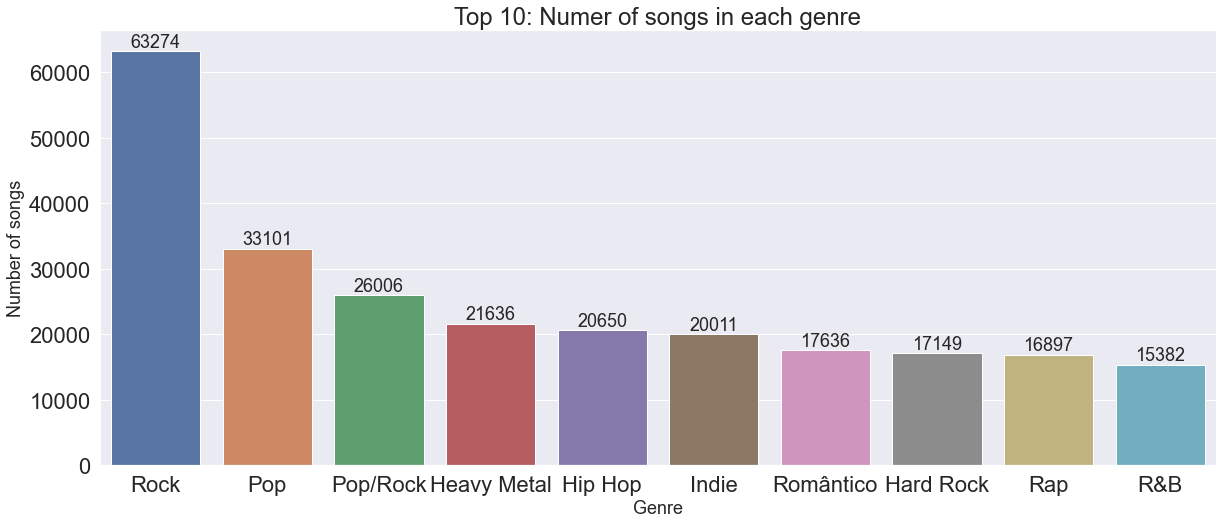

In [151]:
# Plotting the top 10 genres with the highest number of songs
genres = list(top_10.genre)
sns.set(font_scale = 2)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = genres, y = top_10['number of songs'])
plt.title("Top 10: Numer of songs in each genre", fontsize=24)
plt.ylabel('Number of songs', fontsize=18)
plt.xlabel('Genre', fontsize=18)

#adding the text labels
rects = ax.patches
labels = top_10['number of songs']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

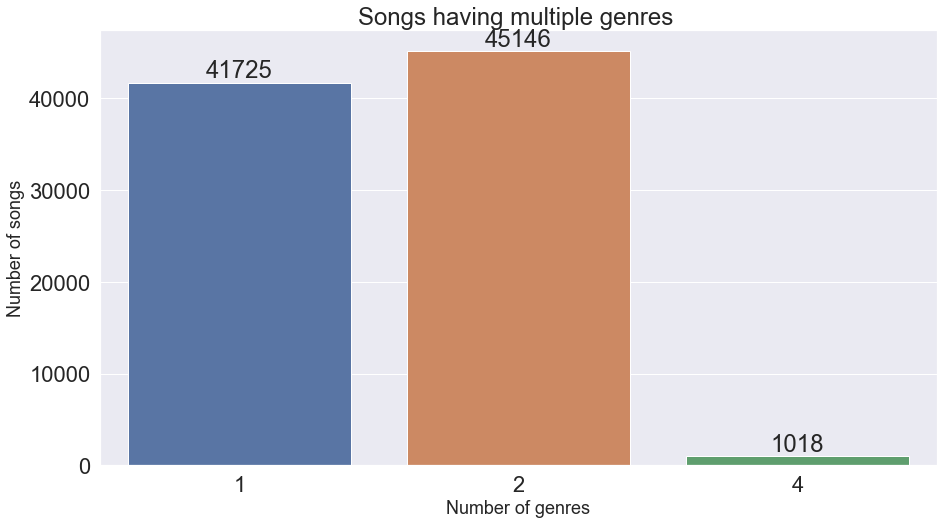

In [152]:
# Plotting the number of songs per number of genres
rowSums = df_eng.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

# Sort multiLabel_counts in ascending order
multiLabel_counts = multiLabel_counts.sort_index()

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)

plt.title("Songs having multiple genres ")
plt.ylabel('Number of songs', fontsize=18)
plt.xlabel('Number of genres', fontsize=18)

# Adding the genres
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

> Most english songs are labelled with 2 genres

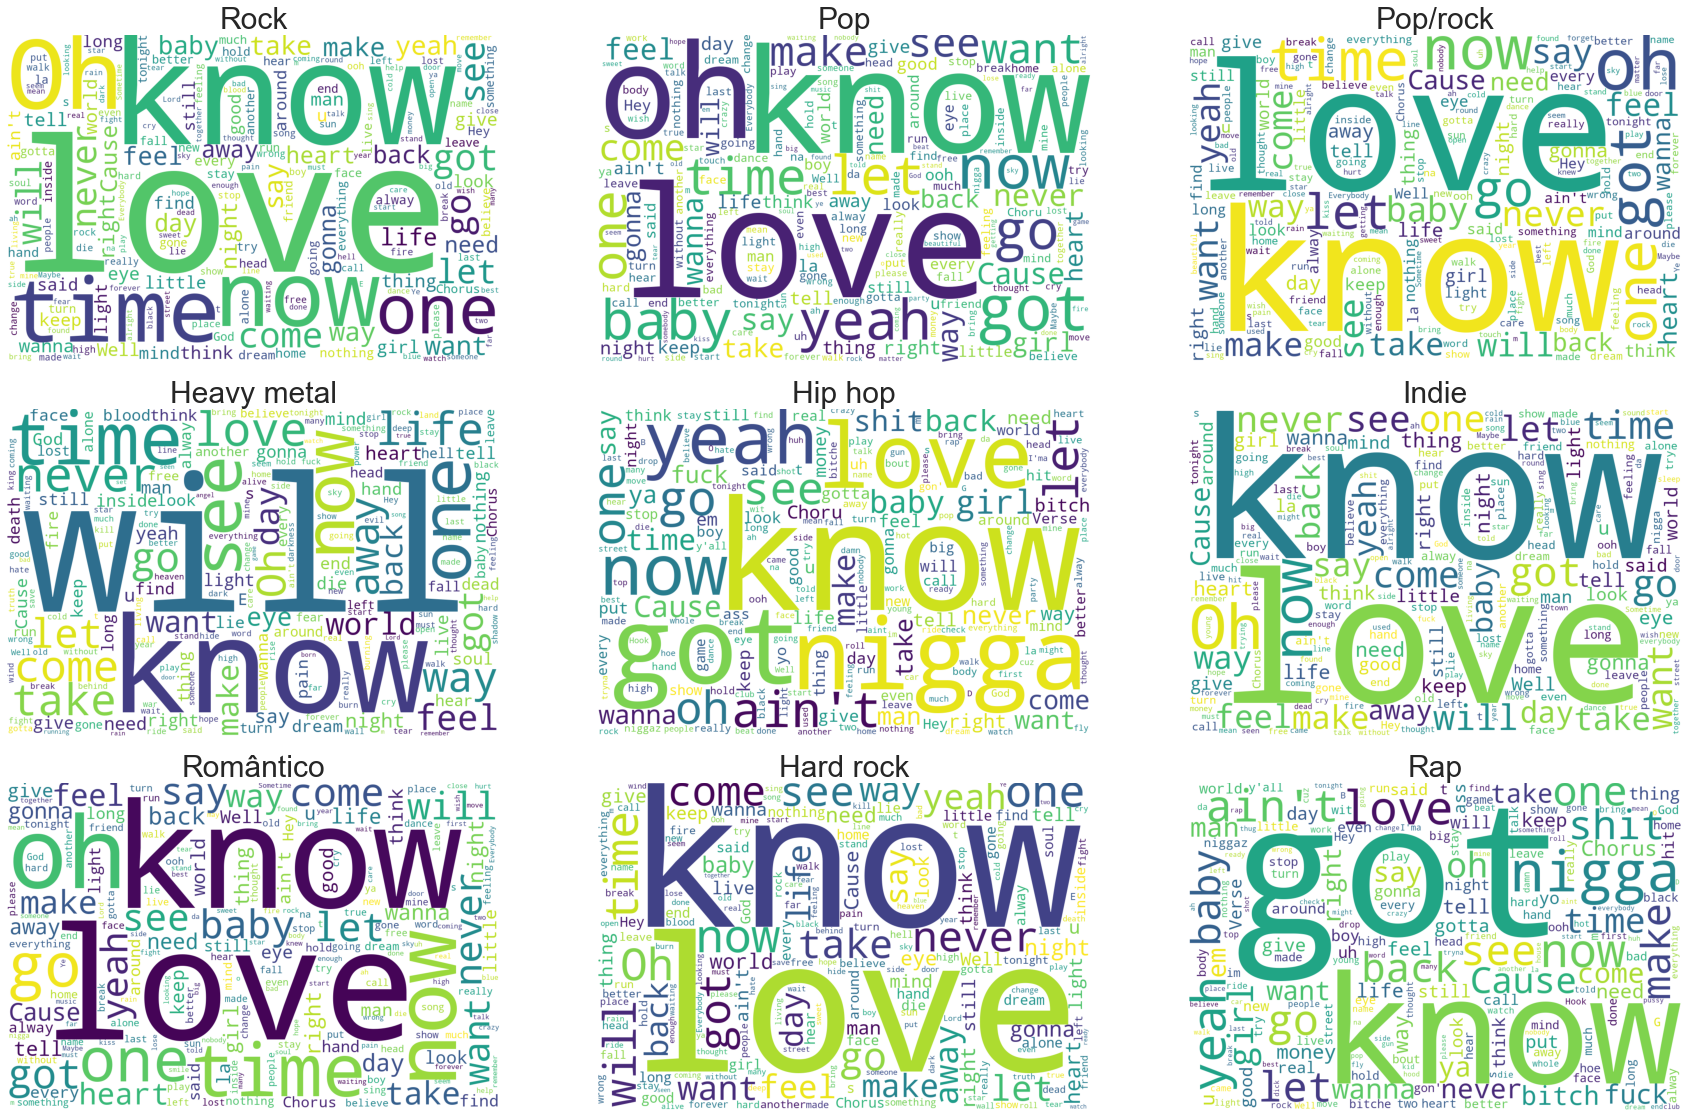

In [153]:
# Plotting a wordcloud that shows that most used words for the top 9 genres
plt.figure(figsize=(30,20))

genres_top_9 = ['Rock','Pop','Pop/Rock','Heavy Metal','Hip Hop','Indie','Romântico','Hard Rock','Rap']

for i, genre in enumerate(genres_top_9):
    subset = df_eng[df_eng[genre] == 1]
    text = subset.Lyric.values
    cloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      collocations=False,
                      width=1200,
                      height=800
                     ).generate(" ".join(text))

    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.title(genre.capitalize(), fontsize=30)
    plt.imshow(cloud)
    
plt.subplots_adjust(hspace=0.1)
plt.show()

In [154]:
label_counts = np.sum(y, axis=0)
label_counts = label_counts.sort_values(ascending = False)
label_counts

Rock             63274
Pop              33101
Pop/Rock         26006
Heavy Metal      21636
Hip Hop          20650
                 ...  
Pagode              27
Forró               18
Kizomba              7
Electro Swing        6
Regional             2
Length: 75, dtype: int64

In [155]:
df_eng.shape

(186722, 77)

In [156]:
# We will only keep the top 5 genres for dimensionality reduction purposes
df_eng = df_eng[['Lyric','Rock','Pop','Pop/Rock','Heavy Metal','Hip Hop']]

In [157]:
df_eng.shape

(186722, 6)

In [158]:
# Next, we will drop all the rows that do not include any of the top 9 genres 
df_eng = df_eng[(df_eng.iloc[:,1:] != 0).any(axis=1)]

In [159]:
df_eng.shape

(126471, 6)

In [160]:
y = df_eng.iloc[:, 1:]

In [161]:
genres_top_5 = ['Rock','Pop','Pop/Rock','Heavy Metal','Hip Hop']

In [162]:
# Calculating number of songs under each of the remaining genre label
counts = []
for genre in genres_top_5:
    counts.append((genre, y[genre].sum()))
df_stats = pd.DataFrame(counts, columns=['genre', 'number of songs'])
df_stats = df_stats.sort_values("number of songs", ascending = False)

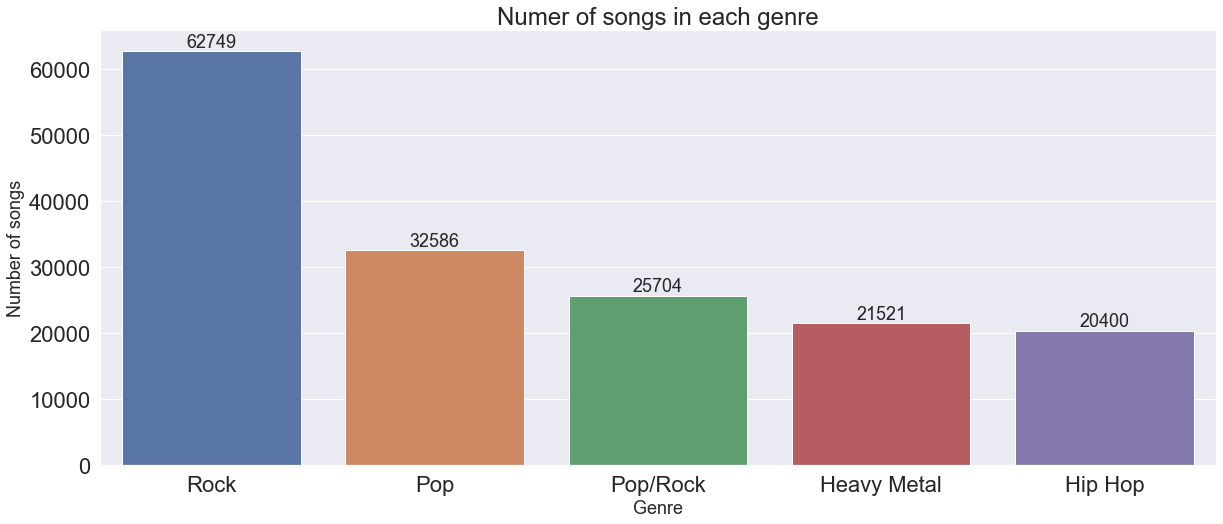

In [163]:
# Plotting the number of songs for the remaining genres
genres = list(df_stats.genre)
sns.set(font_scale = 2)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = genres, y = df_stats['number of songs'])
plt.title("Numer of songs in each genre", fontsize=24)
plt.ylabel('Number of songs', fontsize=18)
plt.xlabel('Genre', fontsize=18)

#adding the text labels
rects = ax.patches
labels = df_stats['number of songs']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

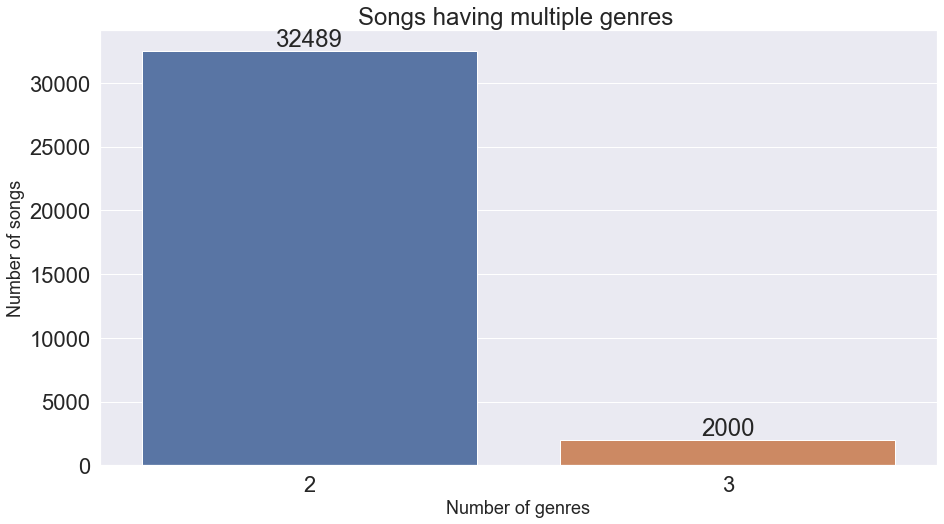

In [164]:
# Plotting the number of songs per number of genres
rowSums = y.sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

# Sort multiLabel_counts in ascending order
multiLabel_counts = multiLabel_counts.sort_index()

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)

plt.title("Songs having multiple genres ")
plt.ylabel('Number of songs', fontsize=18)
plt.xlabel('Number of genres', fontsize=18)

# Adding the genres
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

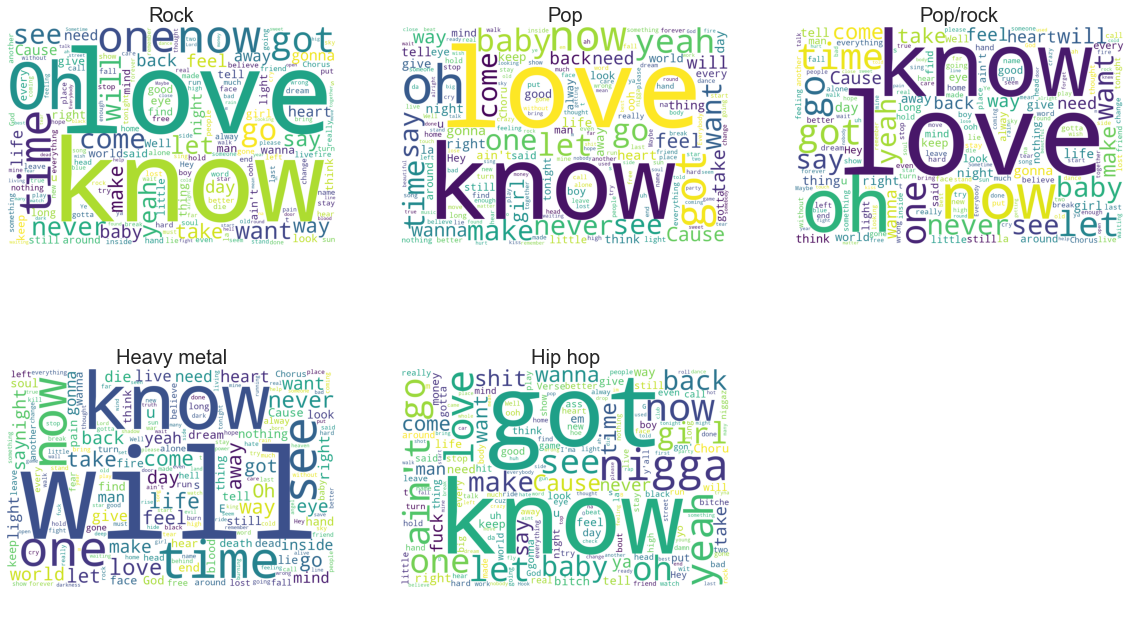

In [165]:
# Plotting a wordcloud that shows that most used words for the 5 remaining genres
plt.figure(figsize=(20, 12))

for i, genre in enumerate(genres_top_5):
    subset = df_eng[df_eng[genre] == 1]
    text = subset.Lyric.values
    cloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      collocations=False,
                      width=1200,
                      height=800
                     ).generate(" ".join(text))

    plt.subplot(2, 3, i+1)
    plt.axis('off')
    plt.title(genre.capitalize(), fontsize=20)
    plt.imshow(cloud) 

# Add an empty subplot at the end
plt.subplot(2, 3, 6)
plt.axis('off')

plt.subplots_adjust(hspace=0.1)
plt.show()

## Machine Learning

In [166]:
df_eng

,Lyric,Rock,Pop,Pop/Rock,Heavy Metal,Hip Hop
0,I feel so unsure\nAs I take your hand and lead...,0,1,0,0,0
1,"Don't let them fool, ya\nOr even try to school...",0,1,0,0,0
2,"Baby, let's cruise, away from here\nDon't be c...",0,1,0,0,0
3,"Know it sounds funny\nBut, I just can't stand ...",0,1,0,0,0
4,You've got that look again\nThe one I hoped I ...,0,1,0,0,0
...,...,...,...,...,...,...
188616,Why can't I be on my own\nJust me and the worl...,0,0,0,0,1
188617,"(Race of Abel)\nEat, sleep and drink\nGod smil...",0,0,0,0,1
188618,I just can't get enough\nI just can't get enou...,0,0,0,0,1
188619,Wild wild child of the London night\nProwling ...,0,0,0,0,1


In [167]:
df_eng_sample = df_eng.sample(n=5000, random_state = 42)

### Preprocessing the Lyric Column

In [168]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [169]:
import neattext as nt
import neattext.functions as nfx

In [170]:
# Explore For Noise
df_eng_sample['Lyric'].apply(lambda x:nt.TextFrame(x).noise_scan())

67811     {'text_noise': 15.199034981905909, 'text_lengt...
89291     {'text_noise': 16.16071428571429, 'text_length...
75435     {'text_noise': 17.8714859437751, 'text_length'...
97518     {'text_noise': 15.531135531135531, 'text_lengt...
106906    {'text_noise': 17.857142857142858, 'text_lengt...
                                ...                        
13622     {'text_noise': 16.403402187120292, 'text_lengt...
174990    {'text_noise': 8.958837772397095, 'text_length...
145442    {'text_noise': 16.535433070866144, 'text_lengt...
62270     {'text_noise': 11.548223350253807, 'text_lengt...
28031     {'text_noise': 15.028901734104046, 'text_lengt...
Name: Lyric, Length: 5000, dtype: object

In [171]:
df_eng_sample['Lyric'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

67811     [down, in, the, where, the, some, just, a, so,...
89291     [for, and, what, for, me, the, but, you, never...
75435     [i, just, how, you, it, here, just, how, you, ...
97518     [and, a, nine, of, still, see, your, don't, wh...
106906    [the, i, don't, even, your, name, i, don't, th...
                                ...                        
13622     [me, me, please, don't, you, i, so, down, here...
174990    [the, a, the, of, when, you're, in, my, a, is,...
145442    [i, can, you, don't, don't, i, can, you, say, ...
62270     [me, they, me, of, the, one, whose, me, in, th...
28031     [i, to, my, and, i, to, you, my, to, all, the,...
Name: Lyric, Length: 5000, dtype: object

**Preprocessing Function**

To preprocess the lyrics column that includes multiple languages, we need to:

- Replace newline \n characters with spaces
- Convert all text to lowercase.
- Remove punctuation and special characters
- Tokenize the text into individual words
- Remove Stop Words
- Stem or lemmatize the remaining words to their root forms

In [172]:
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

# Function to preprocess a single lyric
def preprocess_lyric(lyric):
    # Replace newline characters with spaces
    lyric = re.sub(r'\n', ' ', lyric)
    # Convert to lowercase
    lyric = lyric.lower()
    # Remove punctuation 
    lyric = re.sub(r'[^\w\s]', '', lyric)
    # Remove special characters
    lyric = re.sub(r'[^a-zA-Z\s]', '', lyric, re.I|re.A) 
    # Tokenize into words
    words = word_tokenize(lyric)
    # Remove stop words and stem remaining words
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Join words back into a single string
    processed_lyric = ' '.join(words)
    # Remove extra whitespaces
    lyric = re.sub('\s+', ' ', lyric).strip()
    return processed_lyric

In [173]:
# Deploying the function
corpus = df_eng_sample['Lyric'].apply(preprocess_lyric)

In [174]:
corpus

67811     music matthia jab lyricsmatthia jab citi girl ...
89291     place ive ive seen give strangest dream never ...
75435     know want goe need know give say love yes beli...
97518     fresh white flower new tea light nine cup wate...
106906    wast land instrument ii anonym dont even know ...
                                ...                        
13622     work lord work lord pleas dont leav feel usele...
174990    outsid world mindless child outsid outsid refl...
145442    hey hear talk say dont look dont look hey hear...
62270     oh set sun thi red ray maketh cri remind one w...
28031     want tell bout lover want tell bout best frien...
Name: Lyric, Length: 5000, dtype: object

### Feature Engineering

To build features from our text using Tfidf or word2vec

In [175]:
tfidf = TfidfVectorizer()

In [176]:
tfidf

TfidfVectorizer()

In [177]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [178]:
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [179]:
df_eng_sample.head()

,Lyric,Rock,Pop,Pop/Rock,Heavy Metal,Hip Hop
67811,Music :Matthias Jabs\nLyrics:Matthias Jabs\n\n...,1,0,0,1,0
89291,"For places I've been, and what I've seen\nFor ...",0,0,0,1,0
75435,"I know just how you want it\nHere goes, just h...",1,0,0,0,0
97518,Fresh white flowers and a new tea light\nNine ...,0,0,0,0,1
106906,I. The Waste Land\n(Instrumental)\n\nII. Anony...,1,0,0,0,0


In [180]:
y = df_eng_sample.iloc[:, 1:]

In [181]:
y.head()

,Rock,Pop,Pop/Rock,Heavy Metal,Hip Hop
67811,1,0,0,1,0
89291,0,0,0,1,0
75435,1,0,0,0,0
97518,0,0,0,0,1
106906,1,0,0,0,0


In [268]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

In [269]:
print(df_eng_sample['Lyric'].shape)
print(X_train.shape)

(5000,)
(3500, 22587)


Multi-Class and Multi-Label Text Classification

https://sci2s.ugr.es/keel/multilabel.php#sub10

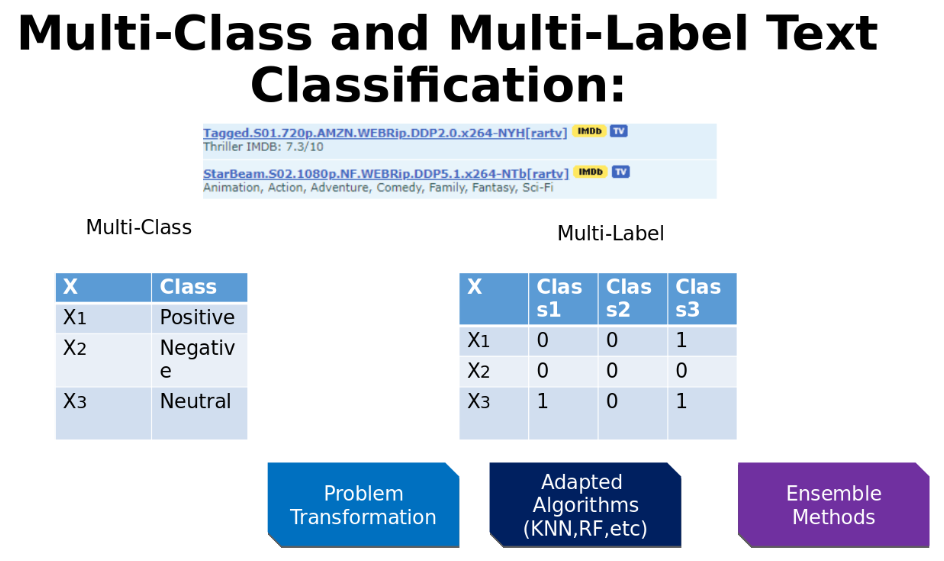

**Solution for Multi-Label Problem**:

Methods for solving Multi-label Classification Problems:
1. Problem Transformation
2. Adapted Algorithm
3. Ensemble approaches

We will be using Problem Transformation:
It refers to transforming the multi-label problem into single-label problem(s) by using
1. Binary Relevance: treats each label as a separate single class classification
2. Classifier Chains:In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.
3. Label Powerset: we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.


#### Binary Relevance Classification

It converts the multi-label classification problem into multiple multi-class classification problems

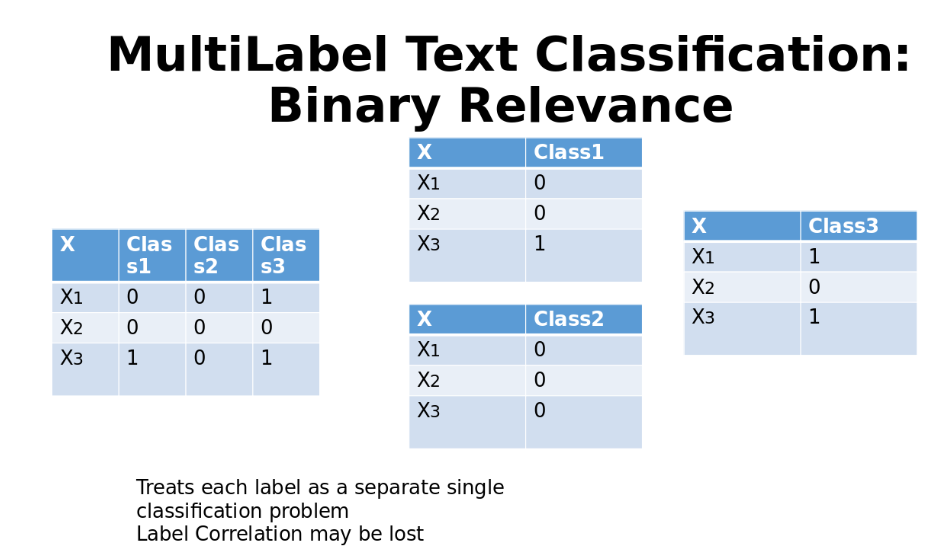

In [275]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    precision = precision_score(ytest,clf_predictions, average='micro')
    recall = recall_score(ytest,clf_predictions, average='micro')
    f1 = f1_score(ytest, clf_predictions, average='micro')
    result = {"accuracy": acc, "hamming_loss":ham, "precision":precision, "recall": recall, "f1_score":f1}
    return result

##### Multinomial Naive Bayes 

In [276]:
binary_rel_mnb = build_model(MultinomialNB(),BinaryRelevance,X_train,y_train,X_test,y_test)

In [277]:
binary_rel_mnb 

{'accuracy': 0.22733333333333333,
 'hamming_loss': 0.2432,
 'precision': 0.5625635808748728,
 'recall': 0.2840267077555213,
 'f1_score': 0.3774744027303754}

##### Gaussian Naive Bayes

In [278]:
binary_rel_gnb = build_model(GaussianNB(),BinaryRelevance,X_train,y_train,X_test,y_test)

In [279]:
binary_rel_gnb

{'accuracy': 0.174,
 'hamming_loss': 0.3464,
 'precision': 0.35915188230203376,
 'recall': 0.4262968669748331,
 'f1_score': 0.38985439173320807}

##### Random Forest

In [280]:
binary_rel_rfc = build_model(RandomForestClassifier(),BinaryRelevance,X_train,y_train,X_test,y_test)

In [281]:
binary_rel_rfc

{'accuracy': 0.2813333333333333,
 'hamming_loss': 0.22946666666666668,
 'precision': 0.6048237476808905,
 'recall': 0.33487416538264,
 'f1_score': 0.43107438016528926}

##### KNN

In [282]:
binary_rel_knn =  build_model(KNeighborsClassifier(),BinaryRelevance,X_train,y_train,X_test,y_test)

In [283]:
binary_rel_knn 

{'accuracy': 0.226,
 'hamming_loss': 0.27186666666666665,
 'precision': 0.46652110625909754,
 'recall': 0.3292244478685157,
 'f1_score': 0.3860283047274917}

##### Logistic Regression

In [284]:
binary_rel_lr =  build_model(LogisticRegression(),BinaryRelevance,X_train,y_train,X_test,y_test)

In [285]:
binary_rel_lr

{'accuracy': 0.25533333333333336,
 'hamming_loss': 0.23453333333333334,
 'precision': 0.5912621359223301,
 'recall': 0.31278890600924497,
 'f1_score': 0.4091367148135707}

##### XGboost

In [286]:
binary_rel_xgb = build_model(XGBClassifier(),BinaryRelevance,X_train,y_train,X_test,y_test)

In [287]:
binary_rel_xgb

{'accuracy': 0.2613333333333333,
 'hamming_loss': 0.23746666666666666,
 'precision': 0.565149136577708,
 'recall': 0.3697996918335901,
 'f1_score': 0.44706612853151195}

#### Classifier Chains

It classifies by preserving the correlations between labels

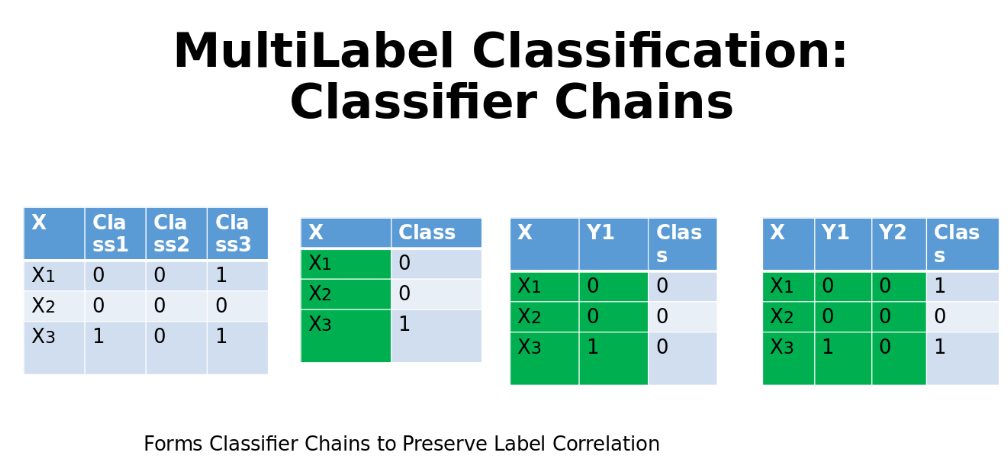

##### Multinomial Naive Bayes

In [288]:
clf_chain_mnb =  build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [289]:
clf_chain_mnb

{'accuracy': 0.23466666666666666,
 'hamming_loss': 0.24173333333333333,
 'precision': 0.5674044265593562,
 'recall': 0.2896764252696456,
 'f1_score': 0.3835430125807548}

##### Gaussian Naive Bayes

In [290]:
clf_chain_gnb =  build_model(GaussianNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [291]:
clf_chain_gnb

{'accuracy': 0.176,
 'hamming_loss': 0.32693333333333335,
 'precision': 0.3805016564126834,
 'recall': 0.41294298921417566,
 'f1_score': 0.3960591133004926}

##### Random Forest

In [292]:
clf_chain_rfc = build_model(RandomForestClassifier(),ClassifierChain,X_train,y_train,X_test,y_test)

In [293]:
clf_chain_rfc 

{'accuracy': 0.2793333333333333,
 'hamming_loss': 0.2296,
 'precision': 0.6050420168067226,
 'recall': 0.33281972265023113,
 'f1_score': 0.42942345924453285}

##### KNN

In [294]:
clf_chain_knn =  build_model(KNeighborsClassifier(),ClassifierChain,X_train,y_train,X_test,y_test)

In [295]:
clf_chain_knn

{'accuracy': 0.27266666666666667,
 'hamming_loss': 0.2944,
 'precision': 0.4228267297457126,
 'recall': 0.3672316384180791,
 'f1_score': 0.39307311709730625}

##### Logistic Regression

In [296]:
clf_chain_lr =  build_model(LogisticRegression(),ClassifierChain,X_train,y_train,X_test,y_test)

In [297]:
clf_chain_lr

{'accuracy': 0.32866666666666666,
 'hamming_loss': 0.256,
 'precision': 0.508760545100584,
 'recall': 0.4026707755521315,
 'f1_score': 0.44954128440366975}

##### XGboost

In [298]:
clf_chain_xgb = build_model(XGBClassifier(),ClassifierChain,X_train,y_train,X_test,y_test)

In [299]:
clf_chain_xgb

{'accuracy': 0.3253333333333333,
 'hamming_loss': 0.26093333333333335,
 'precision': 0.49696969696969695,
 'recall': 0.421160760143811,
 'f1_score': 0.45593550180706144}

#### LabelPowerset Classification
It classifies by giving a unique label to every unique label combination

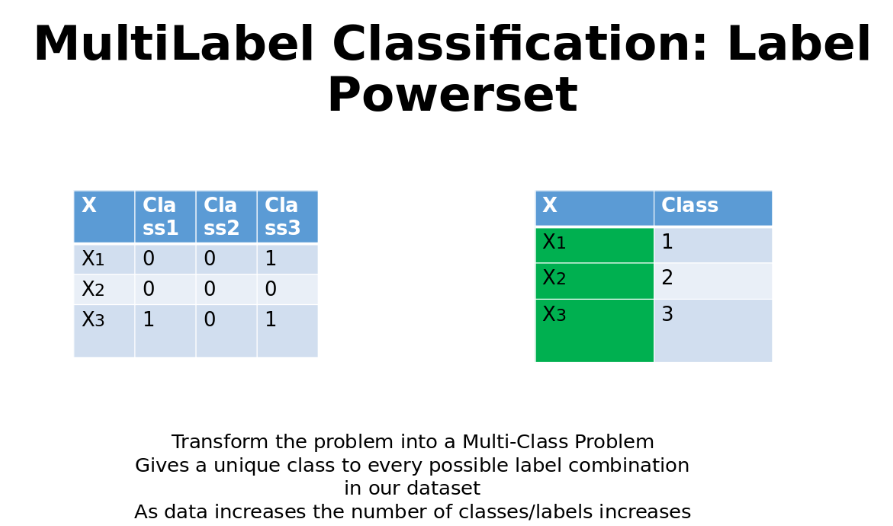

##### Multinomial Naive Bayes

In [300]:
clf_labelP_mnb =  build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)

In [301]:
clf_labelP_mnb

{'accuracy': 0.32466666666666666,
 'hamming_loss': 0.25533333333333336,
 'precision': 0.5106666666666667,
 'recall': 0.39342578325629174,
 'f1_score': 0.4444444444444445}

##### Gaussian Naive Bayes

In [302]:
clf_labelP_gnb =  build_model(GaussianNB(),LabelPowerset,X_train,y_train,X_test,y_test)

In [303]:
clf_labelP_gnb

{'accuracy': 0.262,
 'hamming_loss': 0.3008,
 'precision': 0.4092777451556078,
 'recall': 0.35798664612223935,
 'f1_score': 0.38191780821917803}

##### Random Forest 

In [304]:
clf_labelP_rfc = build_model(RandomForestClassifier(),LabelPowerset,X_train,y_train,X_test,y_test)

In [305]:
clf_labelP_rfc

{'accuracy': 0.382,
 'hamming_loss': 0.22826666666666667,
 'precision': 0.5781769793745841,
 'recall': 0.4463276836158192,
 'f1_score': 0.503768115942029}

##### KNN

In [306]:
clf_labelP_knn =  build_model(KNeighborsClassifier(),LabelPowerset,X_train,y_train,X_test,y_test)

In [307]:
clf_labelP_knn

{'accuracy': 0.25466666666666665,
 'hamming_loss': 0.2988,
 'precision': 0.4146341463414634,
 'recall': 0.3667180277349769,
 'f1_score': 0.3892068683565004}

##### Logistic Regression

In [308]:
clf_labelP_lr =  build_model(LogisticRegression(),LabelPowerset,X_train,y_train,X_test,y_test)

C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [309]:
clf_labelP_lr

{'accuracy': 0.366,
 'hamming_loss': 0.23626666666666668,
 'precision': 0.5572269457161544,
 'recall': 0.43759630200308164,
 'f1_score': 0.49021864211737626}

##### XGboost

In [310]:
clf_labelP_xgb = build_model(XGBClassifier(),LabelPowerset,X_train,y_train,X_test,y_test)

In [311]:
clf_labelP_xgb

{'accuracy': 0.36933333333333335,
 'hamming_loss': 0.23986666666666667,
 'precision': 0.5456226880394575,
 'recall': 0.45454545454545453,
 'f1_score': 0.4959372373213785}

#### Summary of all Results

In [312]:
models_names = ['Binary Relevance using MNB', 'Binary Relevance using GNB',  'Binary Relevance using RFC', 'Binary Relevance using KNN', 'Binary Relevance using LR', 'Binary Relevance using XGB',
                'Classifier Chains using MNB', 'Classifier Chains using GNB',  'Classifier Chains using RFC', 'Classifier Chains using KNN', 'Classifier Chains using LR', 'Classifier Chains using XGB',
                'Label Powerset using MNB', 'Label Powerset using GNB',  'Label Powerset using RFC', 'Label Powerset using KNN', 'Label Powerset using LR', 'Label Powerset using XGB']
models = [binary_rel_mnb, binary_rel_gnb, binary_rel_rfc, binary_rel_knn, binary_rel_lr, binary_rel_xgb,
          clf_chain_mnb, clf_chain_gnb, clf_chain_rfc,clf_chain_knn, clf_chain_lr, clf_chain_xgb,
          clf_labelP_mnb, clf_labelP_gnb, clf_labelP_rfc, clf_labelP_knn, clf_labelP_lr, clf_labelP_xgb]
results = []
for model in models:
   # Create a dictionary of the results
    result_dict = {
        'Model': models_names[models.index(model)],
        'Accuracy': model['accuracy'],
        'Hamming Loss': model['hamming_loss'],
        'Precision': model['precision'],
        'Recall': model['recall'],
        'F1 Score': model['f1_score']
    }
    results.append(result_dict)

# Convert the results list to a Pandas DataFrame
df_results = pd.DataFrame(results)

# Print the results DataFrame
df_results

,Model,Accuracy,Hamming Loss,Precision,Recall,F1 Score
0,Binary Relevance using MNB,0.227333,0.243200,0.562564,0.284027,0.377474
1,Binary Relevance using GNB,0.174000,0.346400,0.359152,0.426297,0.389854
2,Binary Relevance using RFC,0.281333,0.229467,0.604824,0.334874,0.431074
3,Binary Relevance using KNN,0.226000,0.271867,0.466521,0.329224,0.386028
4,Binary Relevance using LR,0.255333,0.234533,0.591262,0.312789,0.409137
5,Binary Relevance using XGB,0.261333,0.237467,0.565149,0.369800,0.447066
6,Classifier Chains using MNB,0.234667,0.241733,0.567404,0.289676,0.383543
7,Classifier Chains using GNB,0.176000,0.326933,0.380502,0.412943,0.396059
8,Classifier Chains using RFC,0.279333,0.229600,0.605042,0.332820,0.429423
9,Classifier Chains using KNN,0.272667,0.294400,0.422827,0.367232,0.393073


In [313]:
df_results.sort_values(['Hamming Loss'])

,Model,Accuracy,Hamming Loss,Precision,Recall,F1 Score
14,Label Powerset using RFC,0.382000,0.228267,0.578177,0.446328,0.503768
2,Binary Relevance using RFC,0.281333,0.229467,0.604824,0.334874,0.431074
8,Classifier Chains using RFC,0.279333,0.229600,0.605042,0.332820,0.429423
4,Binary Relevance using LR,0.255333,0.234533,0.591262,0.312789,0.409137
16,Label Powerset using LR,0.366000,0.236267,0.557227,0.437596,0.490219
5,Binary Relevance using XGB,0.261333,0.237467,0.565149,0.369800,0.447066
17,Label Powerset using XGB,0.369333,0.239867,0.545623,0.454545,0.495937
6,Classifier Chains using MNB,0.234667,0.241733,0.567404,0.289676,0.383543
0,Binary Relevance using MNB,0.227333,0.243200,0.562564,0.284027,0.377474
12,Label Powerset using MNB,0.324667,0.255333,0.510667,0.393426,0.444444


- We will choose the model that has the lowest hamming score and highest precision as the best performing model
- The results show that the **Random Forest Classifier with a Classifier Chain Estimator** achieved the best hamming score and precision

## Deep Learning

### BERT

We will be using Hugging Face Transformers library to load a pre-trained BERT model and its associated tokenizer. The tokenizer is used to preprocess text inputs into a format that can be understood by the BERT model, which is necessary for tasks such as text classification or question answering. By using the BertTokenizer class, Hugging Face automatically downloads the necessary tokenizer files from their model hub if they haven't already been cached on your local machine.


In [65]:
df_eng_sample2 = df_eng_sample.copy()

In [66]:
df_eng_sample2

,Lyric,Rock,Pop,Pop/Rock,Heavy Metal,Hip Hop
67811,Music :Matthias Jabs\nLyrics:Matthias Jabs\n\n...,1,0,0,1,0
89291,"For places I've been, and what I've seen\nFor ...",0,0,0,1,0
75435,"I know just how you want it\nHere goes, just h...",1,0,0,0,0
97518,Fresh white flowers and a new tea light\nNine ...,0,0,0,0,1
106906,I. The Waste Land\n(Instrumental)\n\nII. Anony...,1,0,0,0,0
...,...,...,...,...,...,...
13622,"Work me Lord, work me Lord.\nPlease don't you ...",1,0,0,0,0
174990,Outside the world's a mindless child\noutside\...,1,0,0,0,0
145442,"Hey, I can hear you talking\nSay, don't look d...",1,0,1,0,0
62270,"Oh, setting Sun,\nThy red rays maketh me cry.\...",1,0,0,0,0


In [67]:
df_eng_sample2['Lyric_preprocessed'] = corpus

In [68]:
df_eng_sample2

,Lyric,Rock,Pop,Pop/Rock,Heavy Metal,Hip Hop,Lyric_preprocessed
67811,Music :Matthias Jabs\nLyrics:Matthias Jabs\n\n...,1,0,0,1,0,music matthia jab lyricsmatthia jab citi girl ...
89291,"For places I've been, and what I've seen\nFor ...",0,0,0,1,0,place ive ive seen give strangest dream never ...
75435,"I know just how you want it\nHere goes, just h...",1,0,0,0,0,know want goe need know give say love yes beli...
97518,Fresh white flowers and a new tea light\nNine ...,0,0,0,0,1,fresh white flower new tea light nine cup wate...
106906,I. The Waste Land\n(Instrumental)\n\nII. Anony...,1,0,0,0,0,wast land instrument ii anonym dont even know ...
...,...,...,...,...,...,...,...
13622,"Work me Lord, work me Lord.\nPlease don't you ...",1,0,0,0,0,work lord work lord pleas dont leav feel usele...
174990,Outside the world's a mindless child\noutside\...,1,0,0,0,0,outsid world mindless child outsid outsid refl...
145442,"Hey, I can hear you talking\nSay, don't look d...",1,0,1,0,0,hey hear talk say dont look dont look hey hear...
62270,"Oh, setting Sun,\nThy red rays maketh me cry.\...",1,0,0,0,0,oh set sun thi red ray maketh cri remind one w...


In [69]:
df_eng_sample2 = df_eng_sample2.drop(['Lyric'], axis = 1)

In [70]:
df_eng_sample2.columns

Index(['Rock', 'Pop', 'Pop/Rock', 'Heavy Metal', 'Hip Hop',
       'Lyric_preprocessed'],
      dtype='object')

In [71]:
# rearranging columns
df_eng_sample2 = df_eng_sample2[['Lyric_preprocessed', 'Rock', 'Pop', 'Pop/Rock', 'Heavy Metal', 'Hip Hop']]

In [72]:
df_eng_sample2

,Lyric_preprocessed,Rock,Pop,Pop/Rock,Heavy Metal,Hip Hop
67811,music matthia jab lyricsmatthia jab citi girl ...,1,0,0,1,0
89291,place ive ive seen give strangest dream never ...,0,0,0,1,0
75435,know want goe need know give say love yes beli...,1,0,0,0,0
97518,fresh white flower new tea light nine cup wate...,0,0,0,0,1
106906,wast land instrument ii anonym dont even know ...,1,0,0,0,0
...,...,...,...,...,...,...
13622,work lord work lord pleas dont leav feel usele...,1,0,0,0,0
174990,outsid world mindless child outsid outsid refl...,1,0,0,0,0
145442,hey hear talk say dont look dont look hey hear...,1,0,1,0,0
62270,oh set sun thi red ray maketh cri remind one w...,1,0,0,0,0


In [73]:
from transformers import BertTokenizer, BertModel

In [74]:
# hyperparameters
MAX_LEN = 256
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
EPOCHS = 2
LEARNING_RATE = 1e-05

In [75]:
target_list = ['Rock','Pop', 'Pop/Rock','Heavy Metal','Hip Hop']

In [76]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Testing the BertTokenizer by Hugging Transformers

In [78]:
lyric = df_eng_sample2['Lyric_preprocessed'][89291]
lyric

'place ive ive seen give strangest dream never let know mean oh shame night alright shame youv stolen day snatch away saw sky never wan na die know reason say oh shame night dont care youv done think better run shame sun light youv sold ive lost home magic flame know name oh lord go away tell oh oh shame night dont care youv done know better run shame night place ive ive seen give strangest dream never never never know mean oh shame night dont care youv done go ive got run shame night shame shame shame dream shame sun shame night well lost home magic flame know name shame night shame shame shame night im worthless diver'

In [79]:
encoded_lyric = tokenizer.encode_plus(lyric, 
                                      add_special_tokens = True,
                                      max_length = MAX_LEN, 
                                      padding='max_length',
                                      truncation=True,
                                      return_attention_mask = True,
                                      return_tensors = 'pt')
print(f"Encoded lyric: {encoded_lyric}")

Encoded lyric: {'input_ids': tensor([[  101,  2173,  4921,  2063,  4921,  2063,  2464,  2507,  4326,  3367,
          3959,  2196,  2292,  2113,  2812,  2821,  9467,  2305, 10303,  9467,
          2017,  2615,  7376,  2154, 23365,  2185,  2387,  3712,  2196, 14071,
          6583,  3280,  2113,  3114,  2360,  2821,  9467,  2305,  2123,  2102,
          2729,  2017,  2615,  2589,  2228,  2488,  2448,  9467,  3103,  2422,
          2017,  2615,  2853,  4921,  2063,  2439,  2188,  3894,  8457,  2113,
          2171,  2821,  2935,  2175,  2185,  2425,  2821,  2821,  9467,  2305,
          2123,  2102,  2729,  2017,  2615,  2589,  2113,  2488,  2448,  9467,
          2305,  2173,  4921,  2063,  4921,  2063,  2464,  2507,  4326,  3367,
          3959,  2196,  2196,  2196,  2113,  2812,  2821,  9467,  2305,  2123,
          2102,  2729,  2017,  2615,  2589,  2175,  4921,  2063,  2288,  2448,
          9467,  2305,  9467,  9467,  9467,  3959,  9467,  3103,  9467,  2305,
          2092,  2439, 

**Creating our dataset class**

In [80]:
class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, df, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.df = df
        self.title = df['Lyric_preprocessed']
        self.targets = self.df[target_list].values
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())

        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index])
        }
     

**Train Test Split**

In [81]:
# Split data into training and validation sets
train_data, val_data = train_test_split(df_eng_sample2, test_size=0.2, random_state=42)
train_data = train_data.reset_index(drop = True)
val_data = val_data.reset_index(drop = True)

In [82]:
MAX_LEN

256

In [83]:
train_dataset = CustomDataset(train_data, tokenizer, MAX_LEN)
valid_dataset = CustomDataset(val_data, tokenizer, MAX_LEN)

**Loading the train and valid into torch DataLoader**

In [84]:
train_data_loader = torch.utils.data.DataLoader(train_dataset, 
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset, 
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [85]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


In [86]:
def load_ckp(checkpoint_fpath, model, optimizer):
    """
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into       
    optimizer: optimizer we defined in previous training
    """
    # load check point
    checkpoint = torch.load(checkpoint_fpath)
    # initialize state_dict from checkpoint to model
    model.load_state_dict(checkpoint['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict(checkpoint['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_loss_min = checkpoint['valid_loss_min']
    # return model, optimizer, epoch value, min validation loss 
    return model, optimizer, checkpoint['epoch'], valid_loss_min.item()

def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath = best_model_path
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(f_path, best_fpath)

In [87]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased', return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 5)
    
    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids, 
            attention_mask=attn_mask, 
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output)
        output = self.linear(output_dropout)
        return output

model = BERTClass()
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [88]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [94]:
val_targets = []
val_outputs = []

In [97]:
def train_model(n_epochs, training_loader, validation_loader, model, 
                optimizer):
   
  # initialize tracker for minimum validation loss
  valid_loss_min = np.Inf
   
 
  for epoch in range(1, n_epochs+1):
    train_loss = 0
    valid_loss = 0
    
    model.train()
    print('############# Epoch {}: Training Start   #############'.format(epoch))
    for batch_idx, data in enumerate(training_loader):
        #print('yyy epoch', batch_idx)
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        #if batch_idx%5000==0:
         #   print(f'Epoch: {epoch}, Training Loss:  {loss.item()}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print('before loss data in training', loss.item(), train_loss)
        train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
        #print('after loss data in training', loss.item(), train_loss)
    
    print('############# Epoch {}: Training End     #############'.format(epoch))
    
    print('############# Epoch {}: Validation Start   #############'.format(epoch))
    ######################    
    # validate the model #
    ######################
 
    model.eval()
   
    with torch.no_grad():
      for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype = torch.long)
            mask = data['attention_mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))
            val_targets.extend(targets.cpu().detach().numpy().tolist())
            val_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

      print('############# Epoch {}: Validation End     #############'.format(epoch))
      # calculate average losses
      #print('before cal avg train loss', train_loss)
      train_loss = train_loss/len(training_loader)
      valid_loss = valid_loss/len(validation_loader)
      # print training/validation statistics 
      print('Epoch: {} \tAverage Training Loss: {:.6f} \tAverage Validation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
  return model

In [98]:
train_data

,Lyric_preprocessed,Rock,Pop,Pop/Rock,Heavy Metal,Hip Hop
0,fantasi got got want im prove babi wan na know...,0,1,0,0,1
1,silenc night come distant lullabi cri rememb f...,0,1,1,0,0
2,let start anonym club sit close dark come roun...,1,0,0,0,0
3,fuck titti suckin two ball bitch fat bruis cli...,0,0,0,1,0
4,late call priest anymor look age beast weve se...,1,0,0,1,0
...,...,...,...,...,...,...
3995,super goo super goo oow babi super goo super g...,1,0,0,0,0
3996,thing happen pull string compani caus id like ...,0,0,1,0,0
3997,secret safe tonight sight world come tumbl fin...,0,0,1,0,0
3998,four wing dinosaur draw pay attent imag saw ye...,1,0,0,0,0


In [99]:
# testing
example = val_data['Lyric_preprocessed'][1]
encodings = tokenizer.encode_plus(
    example,
    None,
    add_special_tokens=True,
    max_length=MAX_LEN,
    padding='max_length',
    return_token_type_ids=True,
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
)
model.eval()
with torch.no_grad():
    input_ids = encodings['input_ids'].to(device, dtype=torch.long)
    attention_mask = encodings['attention_mask'].to(device, dtype=torch.long)
    token_type_ids = encodings['token_type_ids'].to(device, dtype=torch.long)
    output = model(input_ids, attention_mask, token_type_ids)
    final_output = torch.sigmoid(output).cpu().detach().numpy().tolist()
    print(train_data.columns[1:].to_list()[int(np.argmax(final_output, axis=1))])

Pop


In [100]:
trained_model = train_model(EPOCHS, train_data_loader, val_data_loader, model, optimizer)

############# Epoch 1: Training Start   #############
############# Epoch 1: Training End     #############
############# Epoch 1: Validation Start   #############
############# Epoch 1: Validation End     #############
Epoch: 1 	Average Training Loss: 0.003593 	Average Validation Loss: 0.014620
############# Epoch 2: Training Start   #############
############# Epoch 2: Training End     #############
############# Epoch 2: Validation Start   #############
############# Epoch 2: Validation End     #############
Epoch: 2 	Average Training Loss: 0.003416 	Average Validation Loss: 0.014696


In [101]:
# convert outputs and targets to numpy arrays
val_outputs_np = np.array(val_outputs)
val_targets_np = np.array(val_targets)

# apply threshold of 0.5 to the outputs to convert them to binary predictions
val_preds = (val_outputs_np > 0.5).astype(int)

# compute accuracy and hamming loss
acc = accuracy_score(val_targets_np, val_preds)
hl = hamming_loss(val_targets_np, val_preds)

print(f"Validation accuracy: {acc:.4f}")
print(f"Validation hamming loss: {hl:.4f}")

Validation accuracy: 0.3410
Validation hamming loss: 0.2219


In [190]:
# compute precision, recall, and F1 score for each label
precision = precision_score(val_targets_np, val_preds, average='micro')
recall = recall_score(val_targets_np, val_preds, average='micro')
f1 = f1_score(val_targets_np, val_preds, average='micro')

print(f"Validation precision: {precision:.4f}")
print(f"Validation recall: {recall:.4f}")
print(f"Validation F1 score: {f1:.4f}")


Validation precision: 0.6049
Validation recall: 0.4427
Validation F1 score: 0.5112


## Multi-Layer Perceptron Classifier (MLP)

In [325]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

In [326]:
# Define MLP model
model_mlp = Sequential()
model_mlp.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)))
model_mlp.add(Dense(units=128, activation='relu'))
model_mlp.add(Dense(units=y_train.shape[1], activation='sigmoid'))
model_mlp.compile(optimizer='adam', loss='binary_crossentropy')

# Train model using fit method
model_mlp.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
55/55 [==============================] - 4s 59ms/step - loss: 0.5614
Epoch 2/10
55/55 [==============================] - 3s 60ms/step - loss: 0.4364
Epoch 3/10
55/55 [==============================] - 3s 62ms/step - loss: 0.3117
Epoch 4/10
55/55 [==============================] - 3s 62ms/step - loss: 0.1918
Epoch 5/10
55/55 [==============================] - 3s 61ms/step - loss: 0.1060
Epoch 6/10
55/55 [==============================] - 3s 63ms/step - loss: 0.0568
Epoch 7/10
55/55 [==============================] - 4s 64ms/step - loss: 0.0305
Epoch 8/10
55/55 [==============================] - 4s 66ms/step - loss: 0.0177
Epoch 9/10
55/55 [==============================] - 4s 64ms/step - loss: 0.0111
Epoch 10/10
55/55 [==============================] - 4s 65ms/step - loss: 0.0077


In [327]:
# Make predictions on test data
y_pred = model_mlp.predict(X_test)

47/47 [==============================] - 1s 8ms/step


In [328]:
# Convert predicted probabilities to binary using threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

In [330]:
# Evaluate model using accuracy, hamming loss, precision, recall and f1score
acc = accuracy_score(y_test, y_pred_binary)
ham = hamming_loss(y_test, y_pred_binary)
print("Accuracy: {:.3f}".format(acc))
print("Hamming loss: {:.3f}".format(ham))

Accuracy: 0.241
Hamming loss: 0.267


In [333]:
# compute precision, recall, and F1 score for each label
precision = precision_score(y_test, y_pred_binary, average='micro')
recall = recall_score(y_test, y_pred_binary, average='micro')
f1 = f1_score(y_test, y_pred_binary, average='micro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")

Precision: 0.4812
Recall: 0.3883
F1 score: 0.4298


In [334]:
# Let us update the df_results table 
# Define the new row
new_row = {'Model': 'BERT', 
           'Accuracy': 0.3410, 
           'Hamming Loss': 0.2219, 
           'Precision': 0.6049, 
           'Recall': 0.4427, 
           'F1 Score': 0.5112}
new_row2 = {'Model': 'MLP', 
           'Accuracy': 0.241, 
           'Hamming Loss': 0.267, 
           'Precision': 0.4812, 
           'Recall': 0.3883, 
           'F1 Score': 0.4298}
# Concatenate the new row to the existing DataFrame
df_results = pd.concat([df_results, pd.DataFrame([new_row, new_row2])], ignore_index=True)

df_results

,Model,Accuracy,Hamming Loss,Precision,Recall,F1 Score
0,Binary Relevance using MNB,0.227333,0.243200,0.562564,0.284027,0.377474
1,Binary Relevance using GNB,0.174000,0.346400,0.359152,0.426297,0.389854
2,Binary Relevance using RFC,0.281333,0.229467,0.604824,0.334874,0.431074
3,Binary Relevance using KNN,0.226000,0.271867,0.466521,0.329224,0.386028
4,Binary Relevance using LR,0.255333,0.234533,0.591262,0.312789,0.409137
5,Binary Relevance using XGB,0.261333,0.237467,0.565149,0.369800,0.447066
6,Classifier Chains using MNB,0.234667,0.241733,0.567404,0.289676,0.383543
7,Classifier Chains using GNB,0.176000,0.326933,0.380502,0.412943,0.396059
8,Classifier Chains using RFC,0.279333,0.229600,0.605042,0.332820,0.429423
9,Classifier Chains using KNN,0.272667,0.294400,0.422827,0.367232,0.393073


In [335]:
# Sorting the results based on the hamming loss
df_results = df_results.sort_values('Hamming Loss')

In [336]:
df_results

,Model,Accuracy,Hamming Loss,Precision,Recall,F1 Score
18,BERT,0.341000,0.221900,0.604900,0.442700,0.511200
14,Label Powerset using RFC,0.382000,0.228267,0.578177,0.446328,0.503768
2,Binary Relevance using RFC,0.281333,0.229467,0.604824,0.334874,0.431074
8,Classifier Chains using RFC,0.279333,0.229600,0.605042,0.332820,0.429423
4,Binary Relevance using LR,0.255333,0.234533,0.591262,0.312789,0.409137
16,Label Powerset using LR,0.366000,0.236267,0.557227,0.437596,0.490219
5,Binary Relevance using XGB,0.261333,0.237467,0.565149,0.369800,0.447066
17,Label Powerset using XGB,0.369333,0.239867,0.545623,0.454545,0.495937
6,Classifier Chains using MNB,0.234667,0.241733,0.567404,0.289676,0.383543
0,Binary Relevance using MNB,0.227333,0.243200,0.562564,0.284027,0.377474


Our two selected models are **BERT** and **Label Powerset using RFC** as they achieved the lower hamming loss score and the highest precision